In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
a = 0
b = 8
h = 0.05
n = 10000
def M(t):
    return 2 - 0.5*t

def K(t):
    return 2 / (1 + 9 * t**2)

In [12]:
k = int(b / h) + 1

Me = np.zeros(k)
Cov = np.zeros((k, k))

for i in range(k):
    Me[i] = M(i*h)
    for j in range(k):
        Cov[i, j] = K(h*(j-i))

eps = norm.rvs(loc=0, scale=1, size=(k, n))

In [13]:
L = np.linalg.cholesky(Cov)
print(np.max(Cov - L@L.T))

6.661338147750939e-16


In [14]:
nu = L@eps
print(Me.reshape(-1, 1))
psi = np.array(nu + Me.reshape(-1, 1))
print(psi)
print(psi.shape)

[[ 2.   ]
 [ 1.975]
 [ 1.95 ]
 [ 1.925]
 [ 1.9  ]
 [ 1.875]
 [ 1.85 ]
 [ 1.825]
 [ 1.8  ]
 [ 1.775]
 [ 1.75 ]
 [ 1.725]
 [ 1.7  ]
 [ 1.675]
 [ 1.65 ]
 [ 1.625]
 [ 1.6  ]
 [ 1.575]
 [ 1.55 ]
 [ 1.525]
 [ 1.5  ]
 [ 1.475]
 [ 1.45 ]
 [ 1.425]
 [ 1.4  ]
 [ 1.375]
 [ 1.35 ]
 [ 1.325]
 [ 1.3  ]
 [ 1.275]
 [ 1.25 ]
 [ 1.225]
 [ 1.2  ]
 [ 1.175]
 [ 1.15 ]
 [ 1.125]
 [ 1.1  ]
 [ 1.075]
 [ 1.05 ]
 [ 1.025]
 [ 1.   ]
 [ 0.975]
 [ 0.95 ]
 [ 0.925]
 [ 0.9  ]
 [ 0.875]
 [ 0.85 ]
 [ 0.825]
 [ 0.8  ]
 [ 0.775]
 [ 0.75 ]
 [ 0.725]
 [ 0.7  ]
 [ 0.675]
 [ 0.65 ]
 [ 0.625]
 [ 0.6  ]
 [ 0.575]
 [ 0.55 ]
 [ 0.525]
 [ 0.5  ]
 [ 0.475]
 [ 0.45 ]
 [ 0.425]
 [ 0.4  ]
 [ 0.375]
 [ 0.35 ]
 [ 0.325]
 [ 0.3  ]
 [ 0.275]
 [ 0.25 ]
 [ 0.225]
 [ 0.2  ]
 [ 0.175]
 [ 0.15 ]
 [ 0.125]
 [ 0.1  ]
 [ 0.075]
 [ 0.05 ]
 [ 0.025]
 [ 0.   ]
 [-0.025]
 [-0.05 ]
 [-0.075]
 [-0.1  ]
 [-0.125]
 [-0.15 ]
 [-0.175]
 [-0.2  ]
 [-0.225]
 [-0.25 ]
 [-0.275]
 [-0.3  ]
 [-0.325]
 [-0.35 ]
 [-0.375]
 [-0.4  ]
 [-0.425]
 [-0.45 ]
 [-0.475]


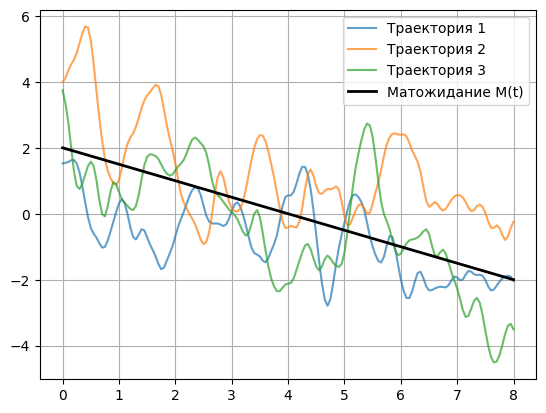

In [15]:
t = np.linspace(a, b, k)

for i in range(3):
    plt.plot(t, psi[:, i], label=f'Траектория {i+1}', alpha=0.7)

# Матожидание
plt.plot(t, M(t), 'k-', linewidth=2, label='Матожидание M(t)')
    
plt.grid(True)
plt.legend()
plt.show()

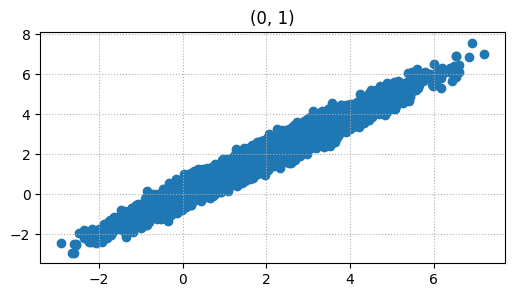

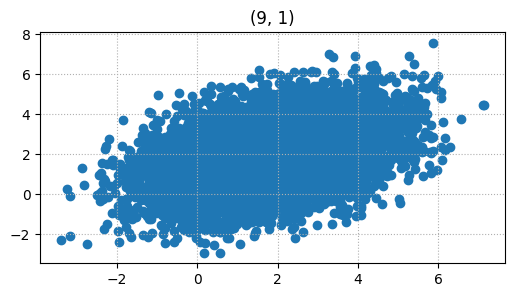

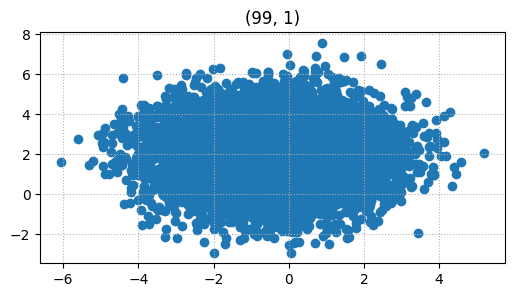

In [16]:
pairs = [(0,1), (9, 1), (99, 1)]
fig, ax = plt.subplots()

ax.figure.set_size_inches(6, 3)
ax.scatter(psi[pairs[0][0], :], psi[pairs[0][1], :])
ax.set_title(label="(0, 1)")

ax.grid(visible=True, linestyle=":")

plt.show()
fig, ax = plt.subplots()
ax.figure.set_size_inches(6, 3)
ax.scatter(psi[pairs[1][0], :], psi[pairs[1][1], :])
ax.set_title(label="(9, 1)")
ax.grid(visible=True, linestyle=':')
# ax.set_xlabel(f’$\\xi_{{{pairs[1][0]}}}$’)
# ax.set_ylabel(f’$\\xi_{{{pairs[1][1]}}}$’)
plt.show()
fig, ax = plt.subplots()
ax.figure.set_size_inches(6, 3)
ax.scatter(psi[pairs[2][0], :], psi[pairs[2][1], :])
ax.set_title(label="(99, 1)")
ax.grid(visible=True, linestyle=':')
#ax.set_xlabel(f’$\\xi_{{{pairs[2][0]}}}$’)
#ax.set_ylabel(f’$\\xi_{{{pairs[2][1]}}}$’)
plt.show()

In [17]:
correlational_coefs = []
norm_dist = norm(loc=0, scale=1)
for pair in pairs:
    N = pair[0]
    m = pair[1]
    s_N = psi[N, :]
    s_N_mean = s_N.mean()
    s_M = psi[m, :]
    s_M_mean = s_M.mean()
    theoretical_cor = Cov[N, m] / np.sqrt(Cov[N, N] * Cov[m, m])
    sample_cor = np.sum([(s_N[i] - s_N_mean)*(s_M[i] - s_M_mean) for i in range(n)]) / \
    np.sqrt(np.sum([(s_N[i] - s_N_mean)**2 for i in range(n)])*np.sum([(s_M[i] - \
    s_M_mean)**2 for i in range(n)]))
    correlational_coefs.append({'theoretical_cor':theoretical_cor, 'sample_cor':sample_cor})
    print(f'{pair}: th: {round(theoretical_cor, 5)} sa: {round(sample_cor, 5)}')

    ro_minus = np.tanh(np.arctanh(sample_cor) - sample_cor/(2*n - 1) - norm.ppf(0.975)/(n - 3)**0.5)
    ro_plus = np.tanh(np.arctanh(sample_cor) - sample_cor/(2*n - 1) + norm.ppf(0.975)/(n - 3)**0.5)
    print(f'{pair}: ro_min: {round(ro_minus, 5)} th: {round(theoretical_cor, 5)}, ro_max: {round(ro_plus, 5)}')

(0, 1): th: 0.978 sa: 0.97783
(0, 1): ro_min: 0.97695 th: 0.978, ro_max: 0.97867
(9, 1): th: 0.40984 sa: 0.39717
(9, 1): ro_min: 0.38051 th: 0.40984, ro_max: 0.41353
(99, 1): th: 0.00461 sa: 0.01388
(99, 1): ro_min: -0.00572 th: 0.00461, ro_max: 0.03347


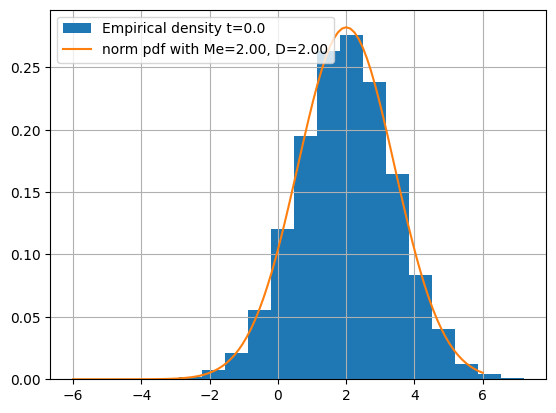

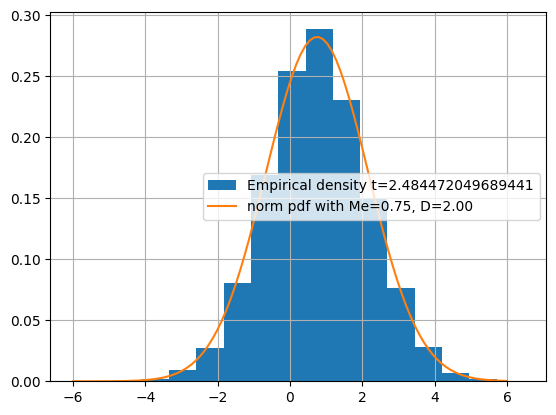

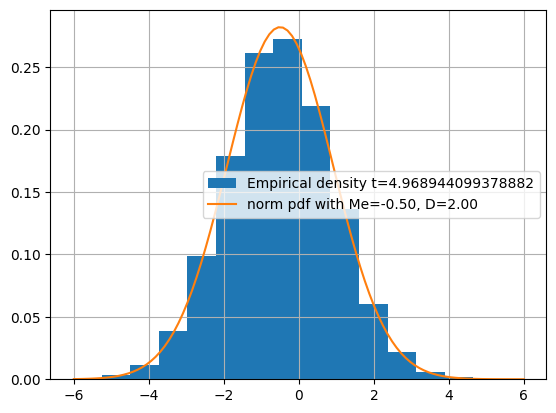

In [19]:
t_i = [0, 50, 100]

for i in t_i:
    x = np.linspace(-6, 6, 100)
    plt.hist(psi[i, :], bins = 15, density=True, label=f"Empirical density t={i/len(Me)*b}")
    plt.plot(x, norm.pdf(x, Me[i], np.sqrt(Cov[i][i])), label=f'norm pdf with Me={Me[i]:.2f}, D={Cov[i][i]:.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()